In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, learning_curve,cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,log_loss

In [44]:
data = pd.read_csv('weather_forecast_data.csv')
data.isna().sum().sum()

0

In [46]:
data.describe().round(4)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure
count,2500.0000,2500.0000,2500.0000,2500.0000,2500.0000
mean,22.5817,64.3471,9.9063,49.6581,1014.3123
std,7.3270,19.9547,5.7803,29.1231,20.1964
min,10.0018,30.0051,0.0098,0.0150,980.0145
25%,16.3594,47.3398,4.7619,23.9000,996.9386
50%,22.5364,63.9208,9.9086,49.4883,1013.4330
75%,28.9765,81.5610,14.9484,75.3241,1031.7351
max,34.9952,99.9975,19.9991,99.9978,1049.9856


In [31]:
data.head(10).round(4)

,Temperature,Humidity,Wind_Speed,Cloud_Cover,Pressure,Rain
0,23.7203,89.5926,7.3356,50.5017,1032.3788,rain
1,27.8797,46.4897,5.9525,4.9901,992.6142,no rain
2,25.0691,83.0728,1.3720,14.8558,1007.2316,no rain
3,23.6221,74.3678,7.0506,67.2553,982.6320,rain
4,20.5914,96.8588,4.6439,47.6764,980.8251,no rain
5,26.1474,48.2173,15.2585,59.7663,1049.7388,no rain
6,20.9397,40.7994,2.2326,45.8275,1014.1738,no rain
7,32.2943,51.8485,2.8736,92.5515,1006.0417,no rain
8,34.0916,48.0571,5.5702,82.5249,993.7320,no rain
9,19.5860,82.9783,5.7605,98.0144,1036.5035,rain


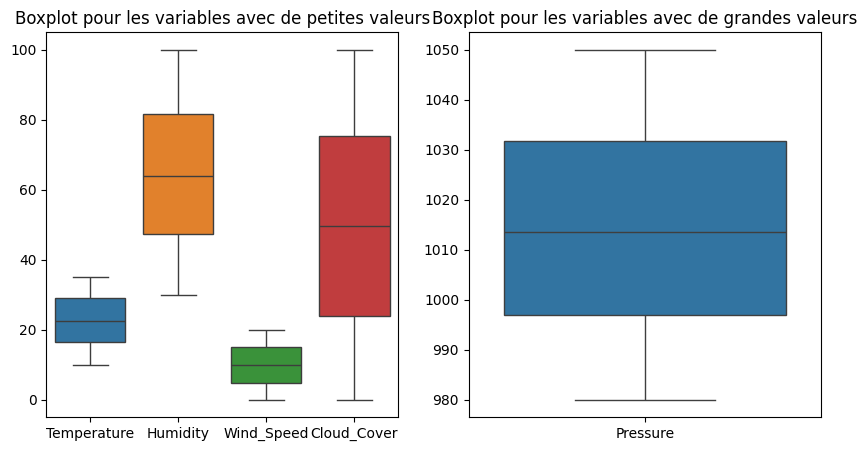

In [32]:
# create two figures side by side
fig, axs = plt.subplots(ncols=2, figsize=(10, 5))

sns.boxplot(data=data.drop(['Pressure'], axis=1), ax=axs[0])
axs[0].set_title('Boxplot pour les variables avec de petites valeurs')

sns.boxplot(data=data[['Pressure']], ax=axs[1])
axs[1].set_title('Boxplot pour les variables avec de grandes valeurs')

plt.show()

In [42]:
data.replace('rain', 1, inplace=True)
data.replace('no rain', 0, inplace=True)

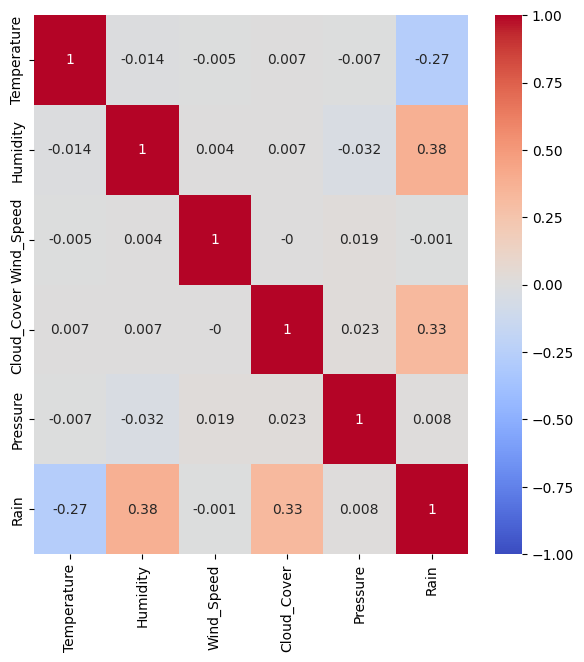

In [34]:
# correlation matrix
plt.figure(figsize=(7, 7))
corr = data.corr().round(3)
sns.heatmap(corr, annot=True, cmap='coolwarm',vmax=1, vmin=-1)
plt.show()

In [38]:
X = data.drop('Rain', axis=1)
y = data['Rain']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=6,stratify=y)

model = LogisticRegression(max_iter=1200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)

print(f'L\'exactiture : {accuracy*100:.2f}%')
print('Le rapport de classification\n',classification_report(y_test,y_pred))

L'exactiture : 93.73%
Le rapport de classification
               precision    recall  f1-score   support

           0       0.96      0.97      0.96       656
           1       0.78      0.70      0.74        94

    accuracy                           0.94       750
   macro avg       0.87      0.84      0.85       750
weighted avg       0.94      0.94      0.94       750



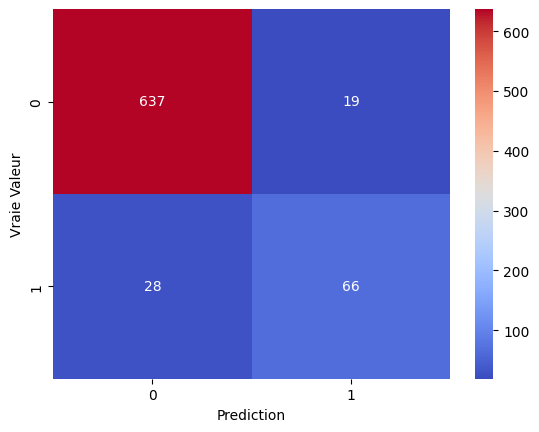

In [37]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Prediction')
plt.ylabel('Vraie Valeur')
plt.show()

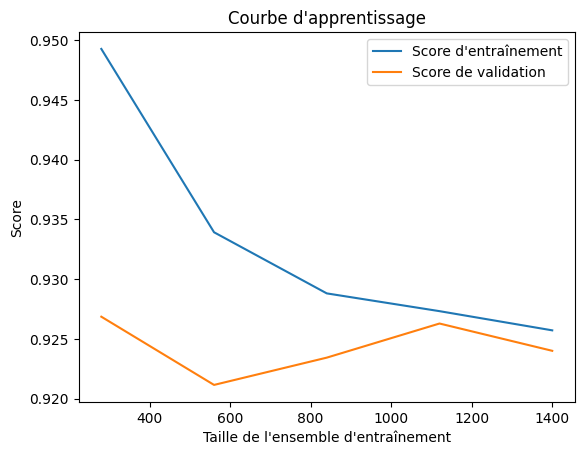

In [39]:
# learning curve
# Tracer la courbe d'apprentissage
n, tr_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.2, 1, 5), cv=5)
plt.plot(n, tr_score.mean(axis=1), label="Score d'entraînement")
plt.plot(n, val_score.mean(axis=1), label="Score de validation")
plt.title("Courbe d'apprentissage")
plt.xlabel("Taille de l'ensemble d'entraînement")
plt.ylabel("Score")
plt.legend()
plt.show()

In [40]:
# corss validation
cvs = cross_val_score(model,X,y,cv=5,n_jobs=2)
print('Cross-validated scores:')
cpt = 1
for i in cvs:
    print(f'Fold {cpt}: {i*100:.2f} %')
    cpt+=1

Cross-validated scores:
Fold 1: 91.80 %
Fold 2: 93.60 %
Fold 3: 93.40 %
Fold 4: 92.80 %
Fold 5: 92.40 %


In [41]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
log_loss_value = log_loss(y_test, y_pred_prob)
print(f"Log Loss: {log_loss_value}")

Log Loss: 0.13996149468190364
